In [3]:
import numpy as np
import pandas as pd

path = 'https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/'

CASE: Yahoo Finance
Nos exercícios a seguir partimos da seguinte base de dados extraída do yahoo finance:
Para consulta de ativos no Yahoo Finance, pesquise em: https://ca.finance.yahoo.com/looku

In [4]:
%%capture
!pip install yfinance

In [5]:
import yfinance as yf

data = yf.download(['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'BRL=X', 'BTC-USD'],'2019-01-01','2023-03-01')
data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                               Close  \
               BRL=X      BTC-USD   ITUB4.SA   PETR4.SA    ^BVSP   BRL=X   
Date                                                                       
2019-01-01    3.8800  3843.520020        NaN        NaN      NaN  3.8800   
2019-01-02    3.8799  3943.409424  31.761515  11.060243  91012.0  3.8799   
2019-01-03    3.7863  3836.741211  32.285152  11.331463  91564.0  3.7863   
2019-01-04    3.7551  3857.717529  31.744339  11.363640  91841.0  3.7551   
2019-01-05       NaN  3845.194580        NaN        NaN      NaN     NaN   

                                                        ...    Open  \
                BTC-USD   ITUB4.SA   PETR4.SA    ^BVSP  ...   BRL=X   
Date                                                    ...           
2019-01-01  3843.520020        NaN        NaN      NaN  ...  3.8800   
2019-01-02  3943.409424  37.000000  24.059999  91012.0  ...  3.8799   
2019-01-03  3836.741211  37.610001  24.650000  91564.0  ...  3.7866   
2019-01-04  3857.717529  36.980000  24.719999  91841.0  ...  3.7550   
2019-01-05  3845.194580        NaN        NaN      NaN  ...     NaN   

                                                       Volume              \
                BTC-USD   ITUB4.SA   PETR4.SA    ^BVSP  BRL=X     BTC-USD   
Date                                                                        
2019-01-01  3746.713379        NaN        NaN      NaN    0.0  4324200990   
2019-01-02  3849.216309  35.439999  22.549999  87887.0    0.0  5244856836   
2019-01-03  3931.048584  36.750000  23.959999  91011.0    0.0  4530215219   
2019-01-04  3832.040039  37.220001  24.850000  91577.0    0.0  4847965467   
2019-01-05  3851.973877        NaN        NaN      NaN    NaN  5137609824   

                                                
              ITUB4.SA     PETR4.SA      ^BVSP  
Date                                            
2019-01-01         NaN          NaN        NaN  
2019-01-02  25581700.0  104534800.0  5615400.0  
2019-01-03  21938600.0   95206400.0  6066200.0  
2019-01-04  24873500.0   72119800.0  5322100.0  
2019-01-05         NaN          NaN        NaN  

[5 rows x 30 columns]

Q1. pd.concat().
Selecione o valor de fechamento ajustado de cada ticket produzindo um DataFrame df com o seguinte aspecto:

In [6]:
pd.read_csv(path + 'lab_yahoo_q1.csv').head()

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-01,3.8800,3843.520020,NaN,NaN,NaN
1,2019-01-02,3.8799,3943.409424,31.761532,11.060242,91012.0
2,2019-01-03,3.7863,3836.741211,32.285156,11.331462,91564.0
3,2019-01-04,3.7551,3857.717529,31.744347,11.363639,91841.0
4,2019-01-05,NaN,3845.194580,NaN,NaN,NaN


In [7]:
data.keys()

MultiIndex([('Adj Close',    'BRL=X'),
            ('Adj Close',  'BTC-USD'),
            ('Adj Close', 'ITUB4.SA'),
            ('Adj Close', 'PETR4.SA'),
            ('Adj Close',    '^BVSP'),
            (    'Close',    'BRL=X'),
            (    'Close',  'BTC-USD'),
            (    'Close', 'ITUB4.SA'),
            (    'Close', 'PETR4.SA'),
            (    'Close',    '^BVSP'),
            (     'High',    'BRL=X'),
            (     'High',  'BTC-USD'),
            (     'High', 'ITUB4.SA'),
            (     'High', 'PETR4.SA'),
            (     'High',    '^BVSP'),
            (      'Low',    'BRL=X'),
            (      'Low',  'BTC-USD'),
            (      'Low', 'ITUB4.SA'),
            (      'Low', 'PETR4.SA'),
            (      'Low',    '^BVSP'),
            (     'Open',    'BRL=X'),
            (     'Open',  'BTC-USD'),
            (     'Open', 'ITUB4.SA'),
            (     'Open', 'PETR4.SA'),
            (     'Open',    '^BVSP'),
            (   'Volume',

In [40]:
df = pd.concat([data[('Adj Close','BRL=X')],data[('Adj Close','BTC-USD')],data[('Adj Close','ITUB4.SA')],data[('Adj Close','PETR4.SA')],data[('Adj Close','^BVSP')]],axis = 1)
df = pd.DataFrame(df)['Adj Close'].reset_index()
df.head()

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-01,3.8800,3843.520020,NaN,NaN,NaN
1,2019-01-02,3.8799,3943.409424,31.761515,11.060243,91012.0
2,2019-01-03,3.7863,3836.741211,32.285152,11.331463,91564.0
3,2019-01-04,3.7551,3857.717529,31.744339,11.363640,91841.0
4,2019-01-05,NaN,3845.194580,NaN,NaN,NaN


In [44]:
BRL = df['BRL=X'].sum()
BTC = df['BTC-USD'].sum()
ITUB4 = df['ITUB4.SA'].sum()
PETR4 = df['PETR4.SA'].sum()
BVSPA = df['^BVSP'].sum()

In [49]:
SomatTototal = BRL+BTC+ITUB4+PETR4+BVSPA
SomatTototal

145801021.607893

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Q2. df.loc.
Crie para o ticket BTC-USD um DataFrame df_day_gain como abaixo com a informação de day_gain, onde True significa um valor maior do ativo no dia seguinte.

In [50]:
#@markdown
pd.read_csv(path + 'lab_yahoo_q2.csv').head()

,Date,day_gain
0,2019-01-02,True
1,2019-01-03,False
2,2019-01-04,True
3,2019-01-05,False
4,2019-01-06,True


In [86]:
df_day_gain = df[['Date','BTC-USD']]
df_day_gain.head()

,Date,BTC-USD
0,2019-01-01,3843.520020
1,2019-01-02,3943.409424
2,2019-01-03,3836.741211
3,2019-01-04,3857.717529
4,2019-01-05,3845.194580


In [113]:
T = 0
F = 0
for i,v in enumerate(df_day_gain['BTC-USD']):
    if i < len(df_day_gain['BTC-USD']):
        if df_day_gain['BTC-USD'].loc[(i+1)] > v:
            T=T+1
        else:
            F = F+1

KeyError: 1520

In [114]:
print(f'F={F}, V={T}')

F=735, V=784


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Q3. df.melt()

Empregue o método melt() do Pandas para transformar o DataFrame df com abaixo.

Dica: use pd.to_datetime(df.Date).dt.day_name() para gerar o nome dos dias da semana.

In [137]:
#@markdown
pd.read_csv(path + 'lab_yahoo_q3.csv').head()

,Date,Ticket,Adj Close,day_of_week
0,2019-01-01,BRL=X,3.8800,Tuesday
1,2019-01-02,BRL=X,3.8799,Wednesday
2,2019-01-03,BRL=X,3.7863,Thursday
3,2019-01-04,BRL=X,3.7551,Friday
4,2019-01-05,BRL=X,NaN,Saturday


(Moodle) Qual o maior valor do Real às sextas-feiras (Friday) dentro do perído e em que data isso ocorreu? (Atenção, a base contém cotações do dólar).

In [126]:
Q3 = pd.melt(df,['Date'])
Q3 = Q3.rename(columns={'variable':'Ticket'})
Q3 = Q3.rename(columns={'value':'Adj Close'})

In [ ]:
for i in Q3:
    Q3['day_of_week'] = pd.to_datetime(Q3.Date).dt.day_name()

In [138]:
Q3.head()

,Date,Ticket,Adj Close,day_of_week
0,2019-01-01,BRL=X,3.8800,Tuesday
1,2019-01-02,BRL=X,3.8799,Wednesday
2,2019-01-03,BRL=X,3.7863,Thursday
3,2019-01-04,BRL=X,3.7551,Friday
4,2019-01-05,BRL=X,NaN,Saturday


In [178]:
sexta = Q3 [Q3['Ticket'] == 'BRL=X']
sexta = sexta[sexta['day_of_week'] == 'Friday']
sexta.head()

,Date,Ticket,Adj Close,day_of_week
3,2019-01-04,BRL=X,3.7551,Friday
10,2019-01-11,BRL=X,3.7079,Friday
17,2019-01-18,BRL=X,3.7489,Friday
24,2019-01-25,BRL=X,3.7698,Friday
31,2019-02-01,BRL=X,3.6428,Friday


In [172]:
sexta['Adj Close'] = 1/sexta['Adj Close']

In [173]:
sexta.head()

,Date,Ticket,Adj Close,day_of_week
3,2019-01-04,BRL=X,0.266304,Friday
10,2019-01-11,BRL=X,0.269694,Friday
17,2019-01-18,BRL=X,0.266745,Friday
24,2019-01-25,BRL=X,0.265266,Friday
31,2019-02-01,BRL=X,0.274514,Friday


In [176]:
sexta.max()

Date           2023-02-24 00:00:00
Ticket                       BRL=X
Adj Close                 0.274514
day_of_week                 Friday
dtype: object

questaooo de merdaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa!

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Q4. df.pivot()

Crie um DataFrame df_Friday, para ter o seguinte formato, somente com os valores de fechamento da semana (Friday) dos ativos.

Dica:

Selecione somente os dias desajados
Aplique o df.pivot()
Faça o reset_index()

In [185]:
Q4 = sexta.tail(4)

In [187]:
Q4['Adj Close'].mean()

5.172925114631653

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Q5. Transformações dos dados.
Converta os valores cabíveis do DataFrame anterior para reais e, em seguida, normalize o valores de cada Ticket.

Dica: norma minmax, divida pelo máximo de cada Ticket).

In [193]:
#@markdown
pd.read_csv(path + 'lab_yahoo_q4.csv').head()

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-04,3.7551,3857.717529,31.744371,11.363641,91841.0
1,2019-01-11,3.7079,3687.365479,32.276577,11.487758,93658.0
2,2019-01-18,3.7489,3657.839355,32.328098,11.676232,96097.0
3,2019-01-25,3.7698,3599.765869,NaN,NaN,NaN
4,2019-02-01,3.6428,3487.945312,33.328152,11.860109,97861.0


In [227]:
df_Friday = Q3
df_Friday = df_Friday[df_Friday['day_of_week'] == 'Friday']
df_Friday = df_Friday[['Date','Ticket','Adj Close']]
df_Friday = df_Friday.pivot(index='Date',columns='Ticket')
df_Friday = df_Friday['Adj Close'].reset_index()
df_Friday.head()

Ticket,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-04,3.7551,3857.717529,31.744339,11.363640,91841.0
1,2019-01-11,3.7079,3687.365479,32.276588,11.487756,93658.0
2,2019-01-18,3.7489,3657.839355,32.328075,11.676231,96097.0
3,2019-01-25,3.7698,3599.765869,NaN,NaN,NaN
4,2019-02-01,3.6428,3487.945312,33.328156,11.860111,97861.0


Execute o gráfico a seguir. Seu DataFrame deve se chamar df_Friday.

Normalização:

In [228]:
for c in ['BTC-USD', 'ITUB4.SA', 'PETR4.SA']:
    df_Friday[c] = df_Friday[c] * df_Friday['BRL=X']

for c in ['BRL=X', 'BTC-USD', 'ITUB4.SA', 'PETR4.SA', '^BVSP']:
    df_Friday[c] = df_Friday[c] / df_Friday[c].max()

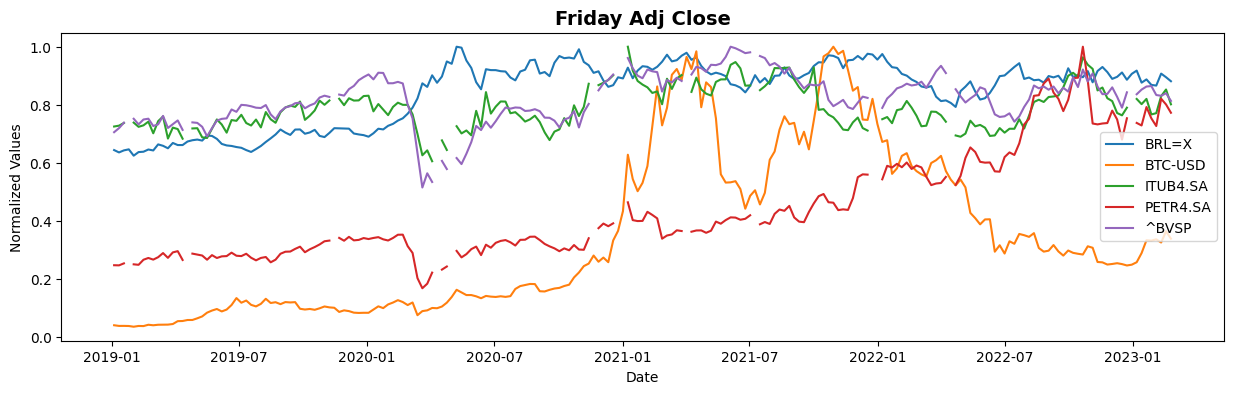

In [229]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,4))

df_Friday = df_Friday.set_index('Date')

for c in ['BRL=X', 'BTC-USD', 'ITUB4.SA', 'PETR4.SA', '^BVSP']:
    plt.plot(df_Friday[c], label=c)

plt.title('Friday Adj Close', fontsize=14, weight='bold')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()

plt.show()